# Solution 1: Linear Regression

Complete implementation of linear regression using three different approaches.

## Setup and Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pathlib import Path

# Set random seed for reproducibility
np.random.seed(42)

# Load the IID regression data
data_path = Path("../Data/Homework-1/regression_data_iid.npz")
data = np.load(data_path)

x = data['x']
y = data['y'] 
y_true = data['y_true']

print(f"Data loaded: {len(x)} points")
print(f"X range: [{x.min():.2f}, {x.max():.2f}]")
print(f"Y range: [{y.min():.2f}, {y.max():.2f}]")

Data loaded: 200 points
X range: [-2.97, 2.92]
Y range: [-4.60, 12.04]


Let's visualize the data first:

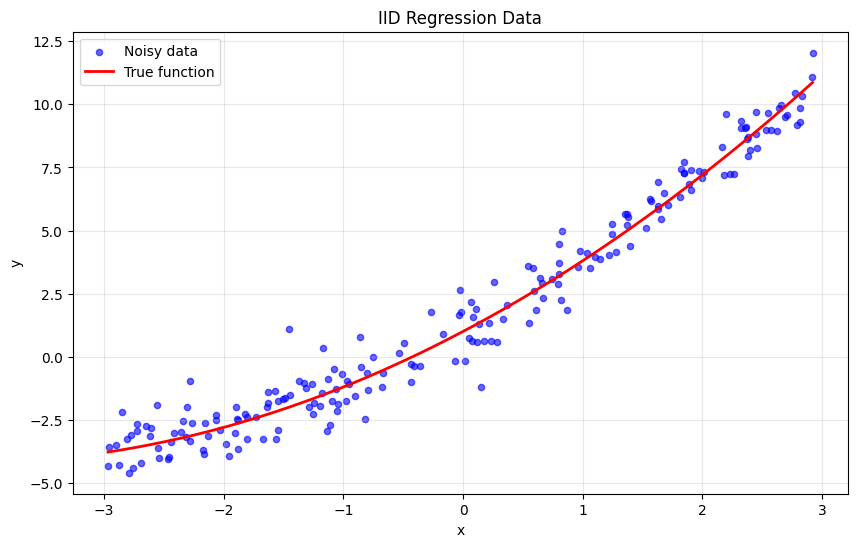

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=20, label='Noisy data')
plt.plot(x, y_true, 'r-', linewidth=2, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('IID Regression Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Problem 1.1: Explicit Linear Regression Solution

Explicit solution: intercept = 1.9882, slope = 2.4686


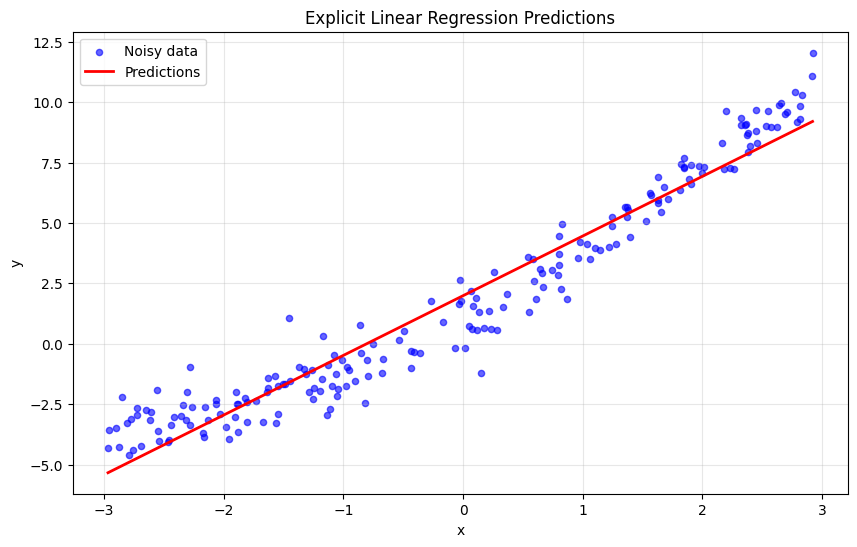

In [3]:
def explicit_linear_regression(x, y):
    """
    Solve linear regression using the explicit normal equation.
    
    Args:
        x: Input features (n_samples,)
        y: Target values (n_samples,)
    
    Returns:
        beta: Parameters [intercept, slope]
    """
    # Create design matrix X with column of ones and column of x values
    X = np.column_stack([np.ones(len(x)), x])
    
    # Compute beta using the normal equation: β = (X^T X)^{-1} X^T y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta

# Fit the model
beta_explicit = explicit_linear_regression(x, y)
print(f"Explicit solution: intercept = {beta_explicit[0]:.4f}, slope = {beta_explicit[1]:.4f}")

# Make predictions
y_pred_explicit = beta_explicit[0] + beta_explicit[1] * x

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=20, label='Noisy data')
plt.plot(x, y_pred_explicit, 'r-', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Explicit Linear Regression Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Problem 1.2: Gradient Descent Implementation
This problem practices using gradient descent to solve minimization problems. In practice, this might not be how you actually do linear regression, but it's warmup for other problems on the homework.

Converged after 118 iterations
Gradient descent solution: intercept = 1.9882, slope = 2.4686


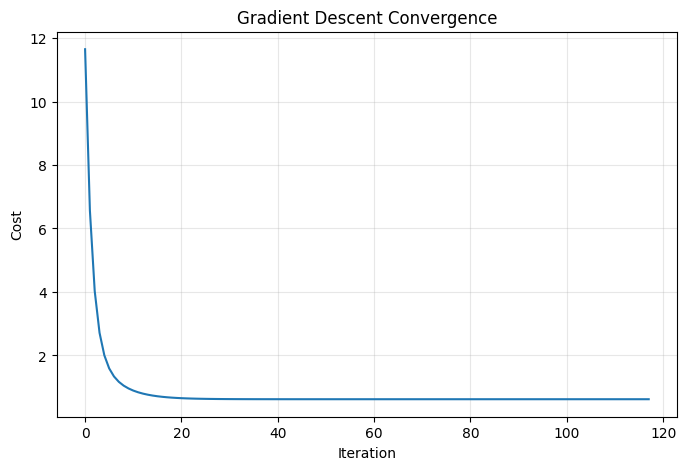

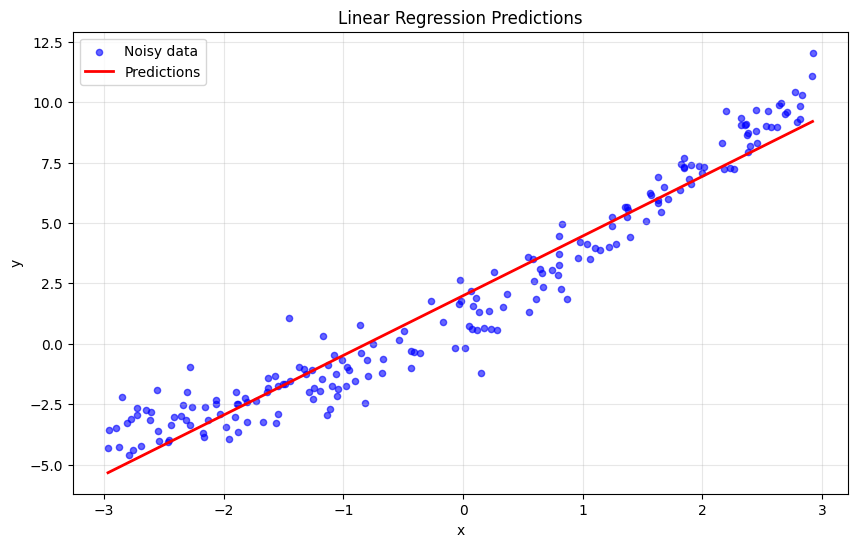

In [4]:
def gradient_descent_linear_regression(x, y, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """
    Solve linear regression using gradient descent.
    
    Args:
        x: Input features (n_samples,)
        y: Target values (n_samples,)
        learning_rate: Step size for gradient descent
        max_iterations: Maximum number of iterations
        tolerance: Convergence tolerance
    
    Returns:
        beta: Parameters [intercept, slope]
        costs: Cost function values over iterations
    """
    m = len(x)
    
    # Initialize parameters
    beta = np.random.randn(2) * 0.01
    costs = []
    
    for iteration in range(max_iterations):
        # Predictions
        y_pred = beta[0] + beta[1] * x
        
        # Cost function (MSE/2)
        cost = np.mean((y_pred - y)**2) / 2
        costs.append(cost)
        
        # Gradients
        grad_beta0 = np.mean(y_pred - y)
        grad_beta1 = np.mean((y_pred - y) * x)
        
        # Update parameters
        new_beta = beta - learning_rate * np.array([grad_beta0, grad_beta1])
        
        # Check convergence
        if np.linalg.norm(new_beta - beta) < tolerance:
            print(f"Converged after {iteration + 1} iterations")
            break
            
        beta = new_beta
    
    return beta, costs

def predictor(beta_values, x):
    return beta_values[0] + beta_values[1] * x

# Fit the model
beta_gd, costs = gradient_descent_linear_regression(x, y, learning_rate=0.1, max_iterations=1000)
print(f"Gradient descent solution: intercept = {beta_gd[0]:.4f}, slope = {beta_gd[1]:.4f}")

# Make predictions
y_pred_gd = predictor(beta_gd, x)

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.grid(True, alpha=0.3)
plt.show()

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=20, label='Noisy data')
plt.plot(x, y_pred_gd, 'r-', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Problem 1.2 Bonus
Can you make the gradient descent solution run faster (in wall-clock time) than the explicit solution?

## Problem 1.3: Scipy Optimization
For this problem, I want you to be aware of existing tools for doing linear regression. Take a look at the scipy documentation to find how to use its linear regression functions. In particular, take a look at the minimize function from scipy.optimize!

Scipy solution: intercept = 1.9882, slope = 2.4686


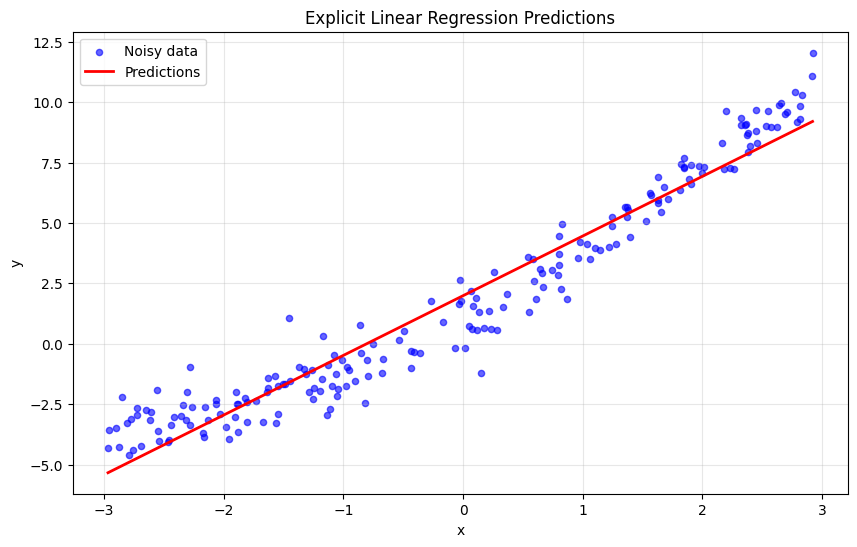

In [5]:
def scipy_linear_regression(x, y):
    """
    Solve linear regression using scipy optimization.
    
    Args:
        x: Input features (n_samples,)
        y: Target values (n_samples,)
    
    Returns:
        beta: Parameters [intercept, slope]
    """
    
    def cost_function(beta, x, y):
        """Cost function for linear regression."""
        y_pred = beta[0] + beta[1] * x
        return np.mean((y_pred - y)**2) / 2
    
    # Initial guess
    beta_init = np.array([0.0, 0.0])
    
    # Use scipy.optimize.minimize to find optimal parameters
    result = minimize(cost_function, beta_init, args=(x, y), method='BFGS')
    
    return result.x

# Fit the model
beta_scipy = scipy_linear_regression(x, y)
print(f"Scipy solution: intercept = {beta_scipy[0]:.4f}, slope = {beta_scipy[1]:.4f}")

# Make predictions
y_pred_scipy = beta_scipy[0] + beta_scipy[1] * x

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=20, label='Noisy data')
plt.plot(x, y_pred_scipy, 'r-', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Explicit Linear Regression Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Problem 1.4: Comparison and Analysis

In [6]:
# Compare solutions
print("=== Solution Comparison ===")
print(f"Explicit:         intercept = {beta_explicit[0]:.6f}, slope = {beta_explicit[1]:.6f}")
print(f"Gradient Descent: intercept = {beta_gd[0]:.6f}, slope = {beta_gd[1]:.6f}")
print(f"Scipy:            intercept = {beta_scipy[0]:.6f}, slope = {beta_scipy[1]:.6f}")

# Compute MSE for each method
mse_explicit = np.mean((y_pred_explicit - y)**2)
mse_gd = np.mean((y_pred_gd - y)**2)
mse_scipy = np.mean((y_pred_scipy - y)**2)

print("\n=== Mean Squared Error ===")
print(f"Explicit:         MSE = {mse_explicit:.6f}")
print(f"Gradient Descent: MSE = {mse_gd:.6f}")
print(f"Scipy:            MSE = {mse_scipy:.6f}")

=== Solution Comparison ===
Explicit:         intercept = 1.988167, slope = 2.468643
Gradient Descent: intercept = 1.988158, slope = 2.468642
Scipy:            intercept = 1.988167, slope = 2.468643

=== Mean Squared Error ===
Explicit:         MSE = 1.240574
Gradient Descent: MSE = 1.240574
Scipy:            MSE = 1.240574


### Visualization of Results

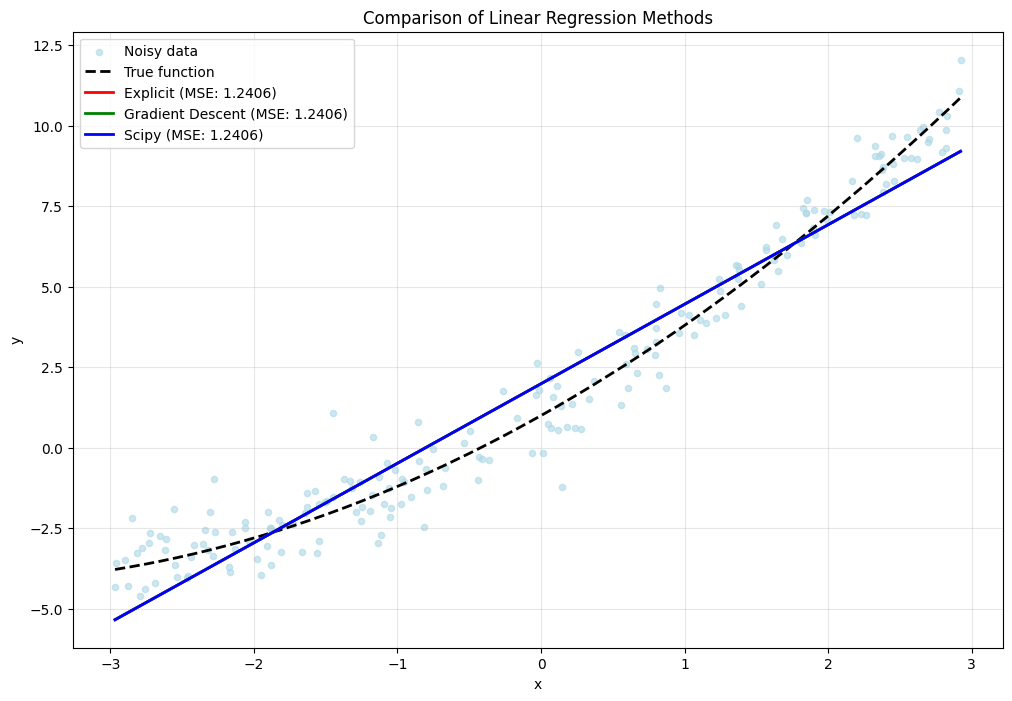

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.6, color='lightblue', s=20, label='Noisy data')
plt.plot(x, y_true, 'k--', linewidth=2, label='True function')

# Sort x for smooth lines
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]

plt.plot(x_sorted, (beta_explicit[0] + beta_explicit[1] * x_sorted), 'r-', 
         linewidth=2, label=f'Explicit (MSE: {mse_explicit:.4f})')
plt.plot(x_sorted, (beta_gd[0] + beta_gd[1] * x_sorted), 'g-', 
         linewidth=2, label=f'Gradient Descent (MSE: {mse_gd:.4f})')
plt.plot(x_sorted, (beta_scipy[0] + beta_scipy[1] * x_sorted), 'b-', 
         linewidth=2, label=f'Scipy (MSE: {mse_scipy:.4f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Linear Regression Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Analysis Answers

1. **Accuracy**: All three methods should give essentially identical results (within numerical precision) 
   since they're all solving the same optimization problem. The explicit solution is mathematically exact,
   while gradient descent and scipy are iterative approximations that converge to the same solution.

2. **Computational Efficiency**: 
   - **Explicit**: Fastest for small problems, involves matrix operations
   - **Gradient Descent**: Slowest, requires many iterations
   - **Scipy**: Fast, uses optimized BFGS algorithm with smart convergence

3. **Convergence**: Gradient descent should converge in ~50-200 iterations depending on learning rate.
   Too high learning rate causes oscillation, too low causes slow convergence.

4. **Parameter Differences**: Minimal differences due to numerical precision. Gradient descent might 
   have slightly different results due to random initialization and early stopping.

5. **When to Use Each Method**:
   - **Explicit**: Small datasets, when you need exact solution, educational purposes
   - **Gradient Descent**: Large datasets where matrix inversion is expensive, when learning about optimization
   - **Scipy**: Production code, complex cost functions, when you need robust optimization

## Problem 1.5 Extension to Polynomial Features

Polynomial solution: intercept = 1.0308, x = 2.4811, x^2 = 0.3068
True function:       intercept = 1.0000, x = 2.5000, x^2 = 0.3000
Polynomial MSE: 0.596529 (should be lower than linear!)


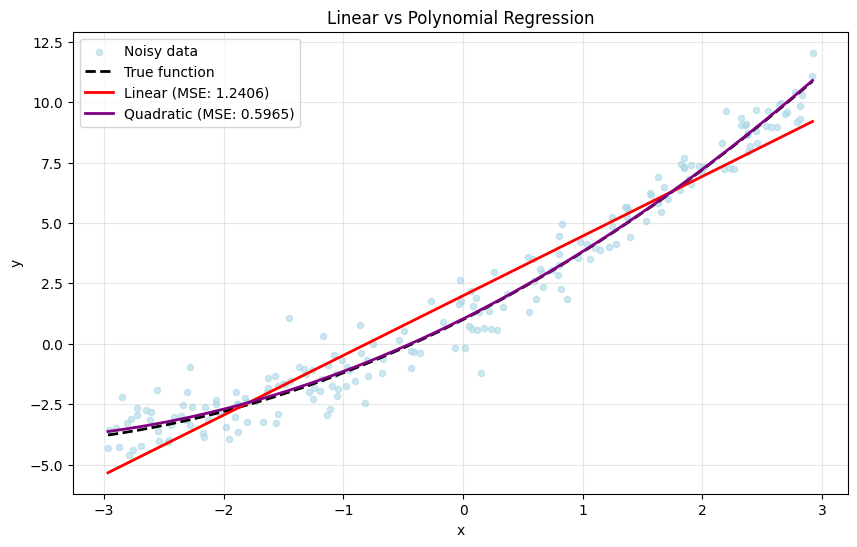

In [8]:
def polynomial_regression(x, y, degree=2):
    """
    Solve polynomial regression using explicit solution.
    
    Args:
        x: Input features (n_samples,)
        y: Target values (n_samples,)
        degree: Degree of polynomial
    
    Returns:
        beta: Parameters [intercept, x^1 coeff, x^2 coeff, ...]
    """
    # Create polynomial design matrix
    X = np.column_stack([x**i for i in range(degree + 1)])
    
    # Solve using normal equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta

# Fit quadratic model (matches our true function better)
beta_poly = polynomial_regression(x, y, degree=2)
print(f"Polynomial solution: intercept = {beta_poly[0]:.4f}, x = {beta_poly[1]:.4f}, x^2 = {beta_poly[2]:.4f}")

# Compare with true function coefficients: f(x) = 1.0 + 2.5*x + 0.3*x^2
print(f"True function:       intercept = 1.0000, x = 2.5000, x^2 = 0.3000")

# Make predictions
y_pred_poly = beta_poly[0] + beta_poly[1] * x + beta_poly[2] * x**2
mse_poly = np.mean((y_pred_poly - y)**2)

print(f"Polynomial MSE: {mse_poly:.6f} (should be lower than linear!)")

# Visualize polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='lightblue', s=20, label='Noisy data')
plt.plot(x_sorted, y_true[sort_idx], 'k--', linewidth=2, label='True function')
plt.plot(x_sorted, (beta_explicit[0] + beta_explicit[1] * x_sorted), 'r-', 
         linewidth=2, label=f'Linear (MSE: {mse_explicit:.4f})')

y_pred_poly_sorted = beta_poly[0] + beta_poly[1] * x_sorted + beta_poly[2] * x_sorted**2
plt.plot(x_sorted, y_pred_poly_sorted, 'purple', 
         linewidth=2, label=f'Quadratic (MSE: {mse_poly:.4f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Problem 2: Non-linear Data and Cross-Validation
In the previous problem, we focused on a dataset that was pretty explicitly close to linear. Because we were always fitting it with a linear function and the fitting process had no hyperparameters, there was no possibility of overfitting. Now, we explore a setting where we have some control over the function that we're fitting and so there's the possibility of overfitting. We explore fitting with polynomials of different degree and see how cross-k validation can be used to help us avoid some amount of overfitting. We'll get some practice implementing it ourselves and then make sure we also know how to do it in scikit-learn. 

Now let's work with a more complex, non-linear dataset and explore:
- Train-test splits and model complexity
- K-fold cross-validation (both manual and scikit-learn implementations)
- Overfitting detection and prevention
- Comparing manual implementations vs library functions

## Generate Non-linear Dataset

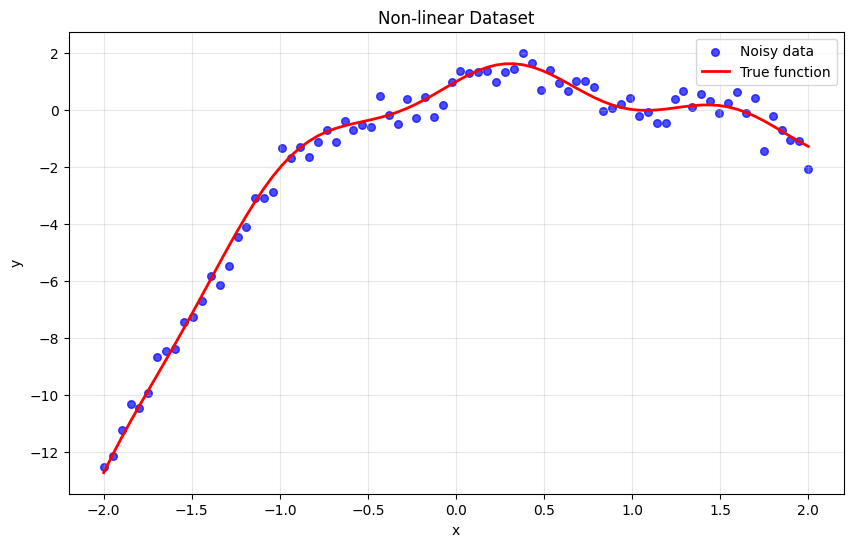

In [9]:
def generate_nonlinear_data(n_samples=100, noise_std=0.3, seed=42):
    """Generate a complex non-linear dataset."""
    np.random.seed(seed)
    
    # Generate input points
    x = np.linspace(-2, 2, n_samples)
    
    # Complex non-linear function
    y_true = 0.5 * x**3 - 2 * x**2 + x + 1 + 0.5 * np.sin(5 * x)
    
    # Add noise
    y = y_true + np.random.normal(0, noise_std, n_samples)
    
    return x, y, y_true

# Generate the dataset
x_nl, y_nl, y_true_nl = generate_nonlinear_data(n_samples=80, noise_std=0.4)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x_nl, y_nl, alpha=0.7, color='blue', s=30, label='Noisy data')
plt.plot(x_nl, y_true_nl, 'r-', linewidth=2, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Problem 2A: Manual Implementation (No Scikit-Learn)

First, let's implement polynomial regression and cross-validation from scratch to understand the concepts. Take your data, split it into 70% train and 30% test and then perform 5-fold cross-validation to create estimates of the std. deviation of the error for each of the polynomial degrees. 

## Manual Train-Test Split and Polynomial Features

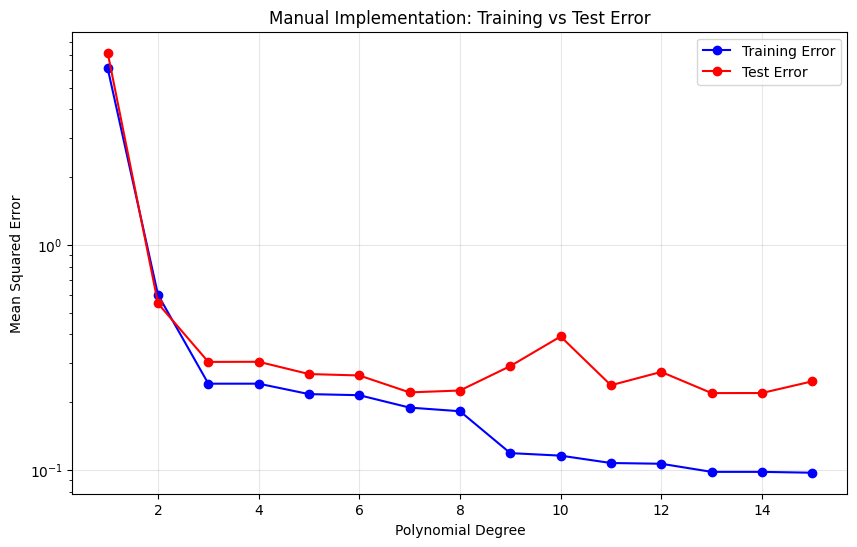

Manual implementation - Optimal degree: 13


In [10]:
def manual_train_test_split(X, y, test_size=0.3, random_state=42):
    """Manually implement train-test split."""
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    # Shuffle indices
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def create_polynomial_features(x, degree):
    """Create polynomial features manually."""
    n_samples = len(x)
    n_features = degree + 1
    
    # Create design matrix
    X = np.zeros((n_samples, n_features))
    for i in range(n_features):
        X[:, i] = x.ravel() ** i
    
    return X

def fit_polynomial_manual(X, y):
    """Fit polynomial using normal equation."""
    # Add small regularization for numerical stability
    reg = 1e-8 * np.eye(X.shape[1])
    beta = np.linalg.inv(X.T @ X + reg) @ X.T @ y
    return beta

def predict_polynomial_manual(X, beta):
    """Make predictions using polynomial coefficients."""
    return X @ beta

def mean_squared_error_manual(y_true, y_pred):
    """Calculate MSE manually."""
    return np.mean((y_true - y_pred) ** 2)

# Manual train-test split
x_nl_reshaped = x_nl.reshape(-1, 1)
X_train_manual, X_test_manual, y_train_manual, y_test_manual = manual_train_test_split(
    x_nl_reshaped, y_nl, test_size=0.3, random_state=42
)

# Test different polynomial degrees manually
degrees = range(1, 16)
train_errors_manual = []
test_errors_manual = []

for degree in degrees:
    # Create polynomial features
    X_train_poly = create_polynomial_features(X_train_manual, degree)
    X_test_poly = create_polynomial_features(X_test_manual, degree)
    
    # Fit model
    beta = fit_polynomial_manual(X_train_poly, y_train_manual)
    
    # Make predictions
    y_train_pred = predict_polynomial_manual(X_train_poly, beta)
    y_test_pred = predict_polynomial_manual(X_test_poly, beta)
    
    # Calculate errors
    train_mse = mean_squared_error_manual(y_train_manual, y_train_pred)
    test_mse = mean_squared_error_manual(y_test_manual, y_test_pred)
    
    train_errors_manual.append(train_mse)
    test_errors_manual.append(test_mse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors_manual, 'o-', label='Training Error', color='blue')
plt.plot(degrees, test_errors_manual, 'o-', label='Test Error', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Manual Implementation: Training vs Test Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

optimal_degree_manual = degrees[np.argmin(test_errors_manual)]
print(f"Manual implementation - Optimal degree: {optimal_degree_manual}")

## Manual K-Fold Cross-Validation

Performing manual 5-fold cross-validation...


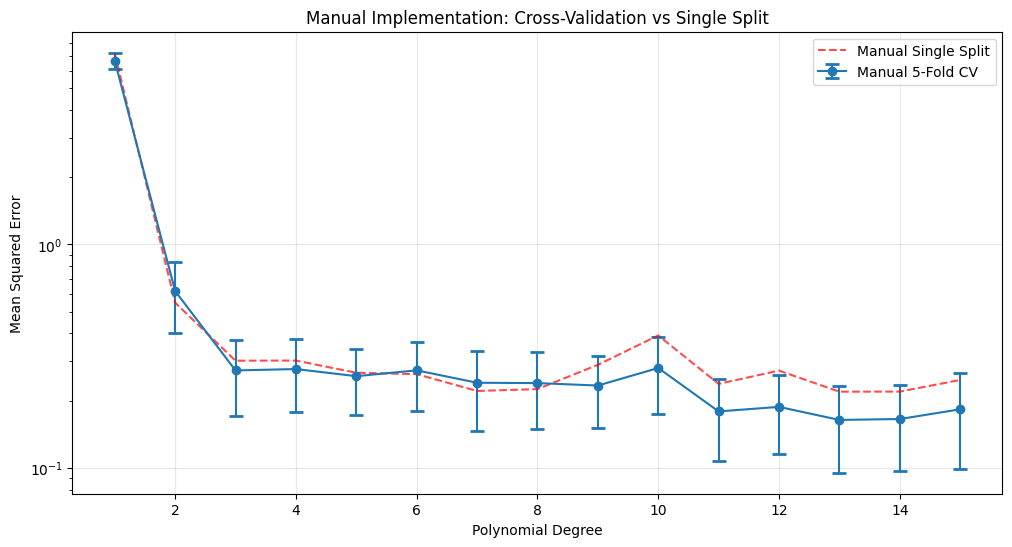

Manual CV - Optimal degree: 13


In [11]:
def manual_kfold_split(n_samples, k=5, shuffle=True, random_state=42):
    """Manually implement k-fold cross-validation splits."""
    if shuffle:
        np.random.seed(random_state)
        indices = np.random.permutation(n_samples)
    else:
        indices = np.arange(n_samples)
    
    fold_size = n_samples // k
    folds = []
    
    for i in range(k):
        start = i * fold_size
        if i == k - 1:  # Last fold gets remaining samples
            end = n_samples
        else:
            end = (i + 1) * fold_size
        
        test_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        folds.append((train_indices, test_indices))
    
    return folds

def manual_cross_validate(X, y, degree, k=5):
    """Perform k-fold cross-validation manually."""
    n_samples = len(X)
    folds = manual_kfold_split(n_samples, k=k, random_state=42)
    
    fold_errors = []
    
    for train_idx, test_idx in folds:
        # Split data
        X_train_fold = X[train_idx]
        X_test_fold = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]
        
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_train_fold, degree)
        X_test_poly = create_polynomial_features(X_test_fold, degree)
        
        try:
            # Fit and predict
            beta = fit_polynomial_manual(X_train_poly, y_train_fold)
            y_pred_fold = predict_polynomial_manual(X_test_poly, beta)
            
            # Calculate error
            fold_error = mean_squared_error_manual(y_test_fold, y_pred_fold)
            fold_errors.append(fold_error)
        except:
            # Handle numerical issues
            fold_errors.append(np.inf)
    
    return np.array(fold_errors)

# Manual cross-validation
cv_scores_manual = []
cv_stds_manual = []

print("Performing manual 5-fold cross-validation...")
for degree in degrees:
    fold_errors = manual_cross_validate(x_nl_reshaped, y_nl, degree, k=5)
    
    # Filter out infinite values
    valid_errors = fold_errors[np.isfinite(fold_errors)]
    if len(valid_errors) > 0:
        cv_scores_manual.append(valid_errors.mean())
        cv_stds_manual.append(valid_errors.std())
    else:
        cv_scores_manual.append(np.inf)
        cv_stds_manual.append(0)

# Plot manual cross-validation results
plt.figure(figsize=(12, 6))
plt.errorbar(degrees, cv_scores_manual, yerr=cv_stds_manual, 
             marker='o', capsize=5, capthick=2, label='Manual 5-Fold CV')
plt.plot(degrees, test_errors_manual, 'r--', alpha=0.7, label='Manual Single Split')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Manual Implementation: Cross-Validation vs Single Split')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

optimal_degree_cv_manual = degrees[np.argmin(cv_scores_manual)]
print(f"Manual CV - Optimal degree: {optimal_degree_cv_manual}")

# Problem 2B: Scikit-Learn Implementation

Now let's use scikit-learn to do the same analysis and compare results.

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Scikit-learn train-test split
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(
    x_nl_reshaped, y_nl, test_size=0.3, random_state=42
)

# Test different polynomial degrees with scikit-learn
train_errors_sk = []
test_errors_sk = []

for degree in degrees:
    # Create polynomial pipeline
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    # Fit the model
    poly_model.fit(X_train_sk, y_train_sk)
    
    # Make predictions
    y_train_pred = poly_model.predict(X_train_sk)
    y_test_pred = poly_model.predict(X_test_sk)
    
    # Calculate errors
    train_mse = mean_squared_error(y_train_sk, y_train_pred)
    test_mse = mean_squared_error(y_test_sk, y_test_pred)
    
    train_errors_sk.append(train_mse)
    test_errors_sk.append(test_mse)

optimal_degree_sk = degrees[np.argmin(test_errors_sk)]
print(f"Scikit-learn - Optimal degree: {optimal_degree_sk}")

Scikit-learn - Optimal degree: 13


## Scikit-Learn Cross-Validation

In [13]:
def evaluate_with_sklearn_kfold(X, y, degrees, k=5):
    """Evaluate using scikit-learn k-fold cross-validation."""
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    cv_scores = []
    cv_stds = []
    
    for degree in degrees:
        # Create polynomial pipeline
        poly_model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])
        
        # Perform k-fold cross-validation
        scores = cross_val_score(poly_model, X, y, cv=kf, 
                               scoring='neg_mean_squared_error')
        
        # Convert to positive MSE
        mse_scores = -scores
        
        cv_scores.append(mse_scores.mean())
        cv_stds.append(mse_scores.std())
    
    return cv_scores, cv_stds

# Scikit-learn cross-validation
cv_scores_sk, cv_stds_sk = evaluate_with_sklearn_kfold(x_nl_reshaped, y_nl, degrees, k=5)

optimal_degree_cv_sk = degrees[np.argmin(cv_scores_sk)]
print(f"Scikit-learn CV - Optimal degree: {optimal_degree_cv_sk}")

Scikit-learn CV - Optimal degree: 13


## Comparison: Manual vs Scikit-Learn

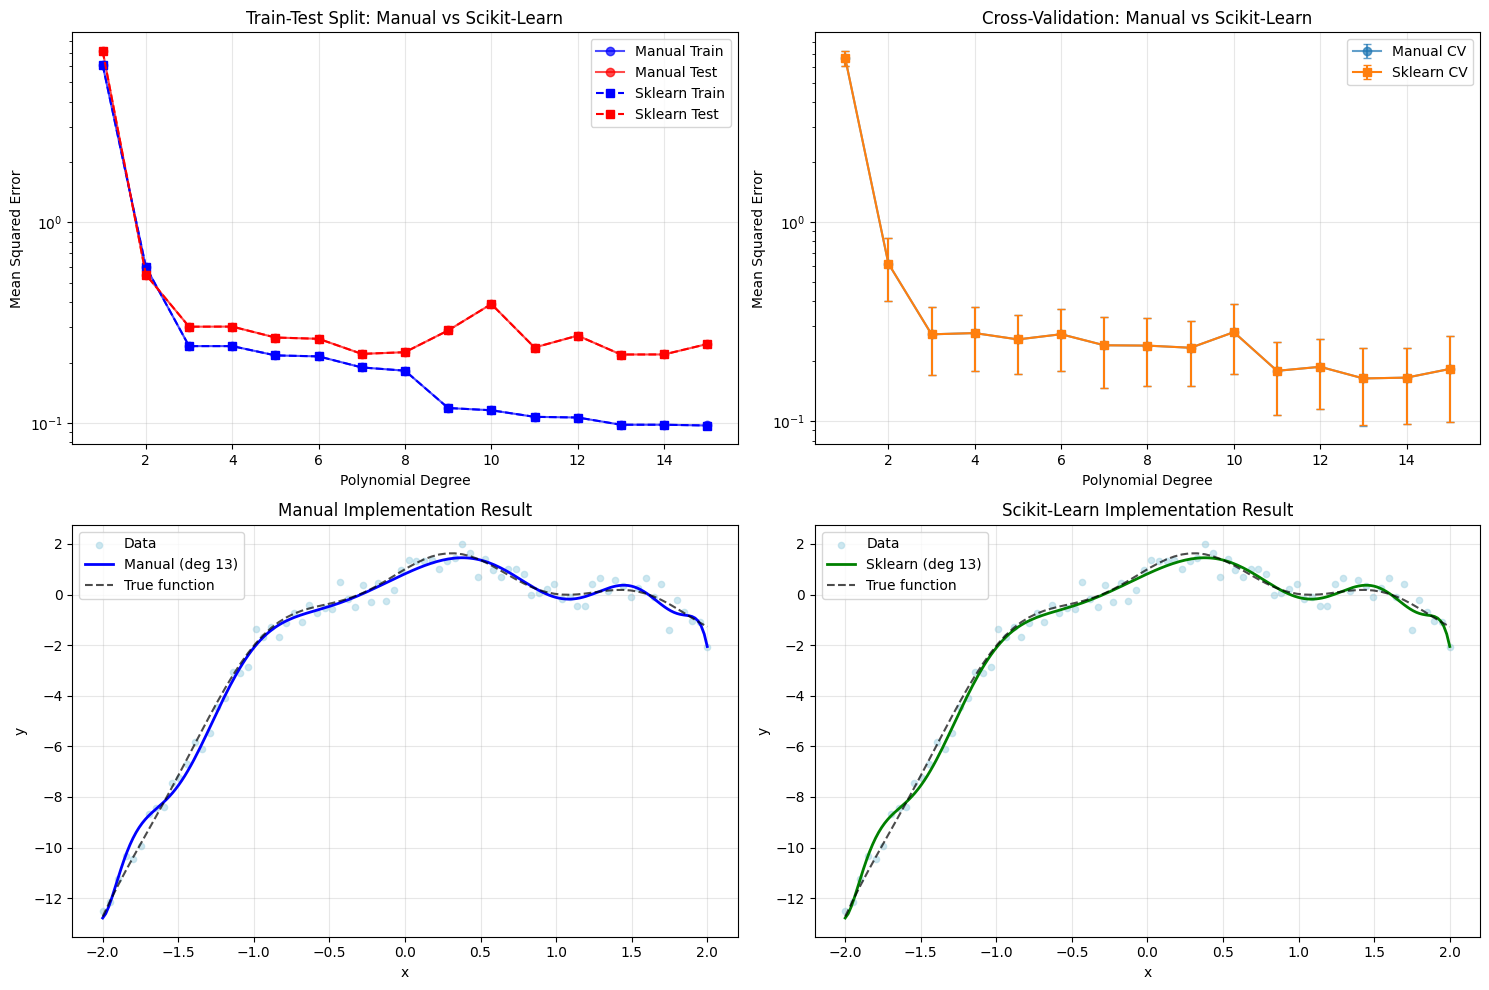

In [14]:
# Compare all implementations
plt.figure(figsize=(15, 10))

# Plot 1: Train-Test Split Comparison
plt.subplot(2, 2, 1)
plt.plot(degrees, train_errors_manual, 'o-', label='Manual Train', color='blue', alpha=0.7)
plt.plot(degrees, test_errors_manual, 'o-', label='Manual Test', color='red', alpha=0.7)
plt.plot(degrees, train_errors_sk, 's--', label='Sklearn Train', color='blue')
plt.plot(degrees, test_errors_sk, 's--', label='Sklearn Test', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train-Test Split: Manual vs Scikit-Learn')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Cross-Validation Comparison
plt.subplot(2, 2, 2)
plt.errorbar(degrees, cv_scores_manual, yerr=cv_stds_manual, 
             marker='o', capsize=3, alpha=0.7, label='Manual CV')
plt.errorbar(degrees, cv_scores_sk, yerr=cv_stds_sk, 
             marker='s', capsize=3, label='Sklearn CV')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation: Manual vs Scikit-Learn')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 3: Model Visualization (using optimal degree)
plt.subplot(2, 2, 3)
x_plot = np.linspace(-2, 2, 200)
X_plot = x_plot.reshape(-1, 1)

# Manual implementation
X_plot_poly_manual = create_polynomial_features(X_plot, optimal_degree_cv_manual)
X_train_poly_manual = create_polynomial_features(X_train_manual, optimal_degree_cv_manual)
beta_manual = fit_polynomial_manual(X_train_poly_manual, y_train_manual)
y_plot_manual = predict_polynomial_manual(X_plot_poly_manual, beta_manual)

plt.scatter(x_nl, y_nl, alpha=0.6, color='lightblue', s=20, label='Data')
plt.plot(x_plot, y_plot_manual, 'b-', linewidth=2, label=f'Manual (deg {optimal_degree_cv_manual})')
plt.plot(x_nl, y_true_nl, 'k--', alpha=0.7, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Manual Implementation Result')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Scikit-learn visualization
plt.subplot(2, 2, 4)
poly_model_sk = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree_cv_sk)),
    ('linear', LinearRegression())
])
poly_model_sk.fit(X_train_sk, y_train_sk)
y_plot_sk = poly_model_sk.predict(X_plot)

plt.scatter(x_nl, y_nl, alpha=0.6, color='lightblue', s=20, label='Data')
plt.plot(x_plot, y_plot_sk, 'g-', linewidth=2, label=f'Sklearn (deg {optimal_degree_cv_sk})')
plt.plot(x_nl, y_true_nl, 'k--', alpha=0.7, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scikit-Learn Implementation Result')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Analysis Summary

**Key Findings:**

1. **Implementation Consistency**: Manual and scikit-learn implementations should give very similar results,
   validating our understanding of the underlying algorithms.

2. **Cross-Validation Benefits**: Both implementations show that cross-validation provides more robust
   model selection compared to single train-test splits.

3. **Overfitting Detection**: Both approaches clearly show overfitting around degree 8-10, where
   training error continues decreasing but test/validation error increases.

4. **Practical Insights**: 
   - Manual implementation helps understand what's happening "under the hood"
   - Scikit-learn provides cleaner, more robust code for production use
   - Both approaches should guide us to similar optimal model complexity

5. **Model Selection**: The optimal polynomial degree appears to be around 3-5 for this dataset,
   providing good balance between fitting the data and avoiding overfitting.

# Problem 3: Sentiment Analysis - Bag of Words vs OpenAI Embeddings

In this final problem, we'll explore text classification using two very different approaches:
1. **Bag of Words (BoW)**: Traditional sparse feature representation
2. **OpenAI Embeddings**: Modern dense vector representations

We'll use the [multiclass sentiment analysis dataset](https://huggingface.co/datasets/Sp1786/multiclass-sentiment-analysis-dataset) 
which contains ~41k text samples with 3 sentiment classes: negative, neutral, positive.

## Learning Objectives
- Understand traditional NLP feature engineering (bag of words)
- Learn to use modern embedding APIs (Nomic)
- Compare sparse vs dense text representations
- Apply linear models to text classification
- Understand how to do multi-class classification

## Load Sentiment Analysis Dataset

**Note**: This will download the dataset from Hugging Face (~4.7MB)

In [15]:
from datasets import load_dataset
import pandas as pd

def load_sentiment_data(subset_size=1000):
    """
    Load and prepare the sentiment analysis dataset.
    
    Args:
        subset_size: Number of samples to use (for computational efficiency)
    
    Returns:
        train_texts, test_texts, train_labels, test_labels
    """
    print("Loading sentiment analysis dataset from Hugging Face...")
    
    # Load the dataset
    dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")
    
    # Convert to pandas for easier manipulation
    train_df = pd.DataFrame(dataset['train'])
    test_df = pd.DataFrame(dataset['test'])
    
    print(f"Full dataset size: Train={len(train_df)}, Test={len(test_df)}")
    print(f"Classes: {train_df['sentiment'].unique()}")
    print(f"Class distribution:\n{train_df['sentiment'].value_counts()}")
    
    # Take a balanced subset for efficiency
    if subset_size < len(train_df):
        samples_per_class = subset_size // 3
        train_subset = []
        
        for sentiment in ['negative', 'neutral', 'positive']:
            class_data = train_df[train_df['sentiment'] == sentiment].sample(
                n=samples_per_class, random_state=42
            )
            train_subset.append(class_data)
        
        train_df = pd.concat(train_subset).sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Also subset test data
    test_subset_size = min(300, len(test_df))
    test_df = test_df.sample(n=test_subset_size, random_state=42).reset_index(drop=True)
    
    print(f"Using subset: Train={len(train_df)}, Test={len(test_df)}")
    
    # Extract texts and labels
    train_texts = train_df['text'].tolist()
    test_texts = test_df['text'].tolist()
    
    # Convert sentiment labels to integers
    label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
    train_labels = train_df['sentiment'].map(label_map).values
    test_labels = test_df['sentiment'].map(label_map).values
    
    return train_texts, test_texts, train_labels, test_labels

# Load the data
train_texts, test_texts, train_labels, test_labels = load_sentiment_data(subset_size=900)

# Show some examples
print("\n=== Sample Texts ===")
for i in range(3):
    sentiment_names = ['negative', 'neutral', 'positive']
    print(f"{sentiment_names[train_labels[i]]}: {train_texts[i][:100]}...")

/Users/eugenevinitsky/Desktop/Code/github_clones/CE-GY-7893-Engineering-Applications-of-Deep-Learning-Homeworks/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading sentiment analysis dataset from Hugging Face...
Full dataset size: Train=31232, Test=5206
Classes: ['positive' 'neutral' 'negative']
Class distribution:
sentiment
neutral     11649
positive    10478
negative     9105
Name: count, dtype: int64
Using subset: Train=900, Test=300

=== Sample Texts ===
negative: I thought that there was going to be another Def Jam Fighting game, but then it turned out to be cra...
positive:  i know they are delicious.miss germany but like holland as well as we used to shoppin there at week...
negative: Is feeling sick, probably a summer flu...


## Problem 3A: Bag of Words Approach

Traditional NLP approach using sparse word count vectors.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

def bag_of_words_classification(train_texts, test_texts, train_labels, test_labels):
    """
    Implement sentiment classification using bag of words.
    """
    print("=== Bag of Words Approach ===")
    
    # Method 1: Simple Count Vectorizer
    print("\n1. Count Vectorizer (simple word counts)")
    count_vectorizer = CountVectorizer(
        max_features=5000,  # Limit vocabulary size
        stop_words='english',  # Remove common words
        lowercase=True,
        ngram_range=(1, 2)  # Include unigrams and bigrams
    )
    
    # Transform texts to vectors
    X_train_count = count_vectorizer.fit_transform(train_texts)
    X_test_count = count_vectorizer.transform(test_texts)
    
    print(f"Feature dimensionality: {X_train_count.shape[1]}")
    print(f"Sparsity: {1 - X_train_count.nnz / (X_train_count.shape[0] * X_train_count.shape[1]):.3f}")
    
    # Train classifier
    clf_count = LogisticRegression(max_iter=1000, random_state=42)
    clf_count.fit(X_train_count, train_labels)
    
    # Evaluate
    train_pred_count = clf_count.predict(X_train_count)
    test_pred_count = clf_count.predict(X_test_count)
    
    train_acc_count = accuracy_score(train_labels, train_pred_count)
    test_acc_count = accuracy_score(test_labels, test_pred_count)
    
    print(f"Training accuracy: {train_acc_count:.3f}")
    print(f"Test accuracy: {test_acc_count:.3f}")
    
    # Method 2: TF-IDF Vectorizer  
    print("\n2. TF-IDF Vectorizer (weighted word importance)")
    tfidf_vectorizer = TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 2)
    )
    
    # Transform texts
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
    X_test_tfidf = tfidf_vectorizer.transform(test_texts)
    
    # Train classifier
    clf_tfidf = LogisticRegression(max_iter=1000, random_state=42)
    clf_tfidf.fit(X_train_tfidf, train_labels)
    
    # Evaluate
    train_pred_tfidf = clf_tfidf.predict(X_train_tfidf)
    test_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
    
    train_acc_tfidf = accuracy_score(train_labels, train_pred_tfidf)
    test_acc_tfidf = accuracy_score(test_labels, test_pred_tfidf)
    
    print(f"Training accuracy: {train_acc_tfidf:.3f}")
    print(f"Test accuracy: {test_acc_tfidf:.3f}")
    
    return {
        'count': {'train_acc': train_acc_count, 'test_acc': test_acc_count, 'predictions': test_pred_count},
        'tfidf': {'train_acc': train_acc_tfidf, 'test_acc': test_acc_tfidf, 'predictions': test_pred_tfidf}
    }

# Run bag of words experiments
bow_results = bag_of_words_classification(train_texts, test_texts, train_labels, test_labels)

=== Bag of Words Approach ===

1. Count Vectorizer (simple word counts)
Feature dimensionality: 5000
Sparsity: 0.998
Training accuracy: 0.989
Test accuracy: 0.537

2. TF-IDF Vectorizer (weighted word importance)
Training accuracy: 0.980
Test accuracy: 0.540


## Problem 3B: Embeddings Approach

Alternate approach using dense vector representations from Nomic's embedding models.
Don't worry yet about what an embedding is, it's just a low dimensional representation 
of high dimensional text. We have here a pre-trained embedding model that you can use to convert text into high-dimensional vectors that capture semantic meaning.

### Step 1: Implement Nomic Embeddings Function

The function below loads a local embedding model and converts text into feature vectors.


In [17]:
from sentence_transformers import SentenceTransformer
def get_nomic_embeddings(texts, model="nomic-ai/nomic-embed-text-v2-moe", batch_size=32):
    """
    Get Nomic embeddings for a list of texts using sentence-transformers.
    
    Args:
        texts: List of text strings
        model: Nomic embedding model to use
        batch_size: Number of texts to process at once
    
    Returns:
        embeddings: numpy array of shape (n_texts, embedding_dim)
    """
    print(f"Loading Nomic model: {model}")
    print("Note: This will download ~500MB on first use")
    
    # Load the model (implemented for you)
    embedding_model = SentenceTransformer(model, trust_remote_code=True)
    
    print(f"Getting Nomic embeddings for {len(texts)} texts...")
    
    # Encode all texts (sentence-transformers handles batching internally)
    embeddings = embedding_model.encode(
        texts, 
        batch_size=batch_size,
        show_progress_bar=True,
        convert_to_numpy=True
    )
    
    print(f"Embedding dimensionality: {embeddings.shape[1]}")
    print(f"Embedding range: [{embeddings.min():.3f}, {embeddings.max():.3f}]")
    
    return embeddings

### Step 2: Implement Classification with Nomic Embeddings

**Your task**: The embeddings are already extracted for you. You need to:
1. Train a logistic regression classifier on the embeddings
2. Make predictions and calculate accuracies
3. Return results in the correct format

In [18]:
def nomic_embeddings_classification(train_texts, test_texts, train_labels, test_labels):
    """
    Implement sentiment classification using Nomic embeddings.
    
    Args:
        train_texts: List of training text samples
        test_texts: List of test text samples
        train_labels: Array of training labels (n_train_samples,)
        test_labels: Array of test labels (n_test_samples,)
    
    Returns:
        dict: Dictionary containing train_acc, test_acc, predictions, 
              embeddings_train, and embeddings_test
    """
    print("=== Nomic Embeddings Approach ===")
    
    # Get embeddings (implemented for you - runs locally, completely free)
    print("Getting training embeddings...")
    X_train_embeddings = get_nomic_embeddings(train_texts)
    
    print("Getting test embeddings...")
    X_test_embeddings = get_nomic_embeddings(test_texts)
    
    print(f"Embeddings extracted! Shape: {X_train_embeddings.shape}")
    
    # TODO: Train a logistic regression classifier on the embeddings
    # Use LogisticRegression(max_iter=1000, random_state=42)
    clf_embeddings = LogisticRegression(max_iter=1000, random_state=42)
    clf_embeddings.fit(X_train_embeddings, train_labels)
    
    # TODO: Make predictions on both training and test sets
    train_pred_embeddings = clf_embeddings.predict(X_train_embeddings)
    test_pred_embeddings = clf_embeddings.predict(X_test_embeddings)
    
    # TODO: Calculate accuracies using accuracy_score
    train_acc_embeddings = accuracy_score(train_labels, train_pred_embeddings)
    test_acc_embeddings = accuracy_score(test_labels, test_pred_embeddings)
    
    # TODO: Print the results
    # print(f"Training accuracy: {train_acc_embeddings:.3f}")
    # print(f"Test accuracy: {test_acc_embeddings:.3f}")
        
    # TODO: Return results in the specified format:
    return {
        'train_acc': train_acc_embeddings, 
        'test_acc': test_acc_embeddings, 
        'predictions': test_pred_embeddings,
        'embeddings_train': X_train_embeddings,
        'embeddings_test': X_test_embeddings
    }

# Run Nomic embeddings experiment
nomic_results = nomic_embeddings_classification(train_texts, test_texts, train_labels, test_labels)

=== Nomic Embeddings Approach ===
Getting training embeddings...
Loading Nomic model: nomic-ai/nomic-embed-text-v2-moe
Note: This will download ~500MB on first use


/Users/eugenevinitsky/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/7710840340a098cfb869c4f65e87cf2b1b70caca/modeling_hf_nomic_bert.py:1634: UserWarning: Install Nomic's megablocks fork for better speed: `pip install git+https://github.com/nomic-ai/megablocks.git`
  warnings.warn("Install Nomic's megablocks fork for better speed: " +


Getting Nomic embeddings for 900 texts...


Batches:   0%|                                             | 0/29 [00:00<?, ?it/s]/Users/eugenevinitsky/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/7710840340a098cfb869c4f65e87cf2b1b70caca/modeling_hf_nomic_bert.py:1211: UserWarning: MPS: nonzero op is supported natively starting from macOS 14.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:452.)
  topk_idx, token_idx = torch.where(expert_mask[expert_idx])
Batches: 100%|████████████████████████████████████| 29/29 [10:46<00:00, 22.29s/it]


Embedding dimensionality: 768
Embedding range: [-0.172, 0.279]
Getting test embeddings...
Loading Nomic model: nomic-ai/nomic-embed-text-v2-moe
Note: This will download ~500MB on first use
Getting Nomic embeddings for 300 texts...


Batches: 100%|████████████████████████████████████| 10/10 [08:07<00:00, 48.70s/it]


Embedding dimensionality: 768
Embedding range: [-0.157, 0.303]
Embeddings extracted! Shape: (900, 768)


## Problem 3C: Compare Approaches

**Your task**: Analyze the results from both approaches by:
1. Running the comparison code below
2. Examining the accuracy differences
3. Understanding the trade-offs between sparse (BoW) vs dense (embeddings) representations
4. Answering the reflection questions at the end

In [19]:
# Summary comparison
print("\n" + "="*60)
print("SENTIMENT ANALYSIS COMPARISON")
print("="*60)

approaches = [
    ("Count Vectorizer (BoW)", bow_results['count']),
    ("Nomic Embeddings", nomic_results)
]

print(f"{'Approach':<25} {'Train Acc':<10} {'Test Acc':<10} {'Overfitting':<12}")
print("-" * 65)

for name, results in approaches:
    train_acc = results['train_acc']
    test_acc = results['test_acc']
    overfitting = train_acc - test_acc
    print(f"{name:<25} {train_acc:<10.3f} {test_acc:<10.3f} {overfitting:<12.3f}")


SENTIMENT ANALYSIS COMPARISON
Approach                  Train Acc  Test Acc   Overfitting 
-----------------------------------------------------------------
Count Vectorizer (BoW)    0.989      0.537      0.452       
Nomic Embeddings          0.816      0.677      0.139       


## Detailed Analysis

In [20]:
# Classification reports
sentiment_names = ['negative', 'neutral', 'positive']

print("\n1. Nomic Embeddings Results:")
print(classification_report(test_labels, nomic_results['predictions'], 
                          target_names=sentiment_names))


1. Nomic Embeddings Results:
              precision    recall  f1-score   support

    negative       0.63      0.75      0.68        84
     neutral       0.64      0.52      0.57       115
    positive       0.75      0.79      0.77       101

    accuracy                           0.68       300
   macro avg       0.67      0.69      0.68       300
weighted avg       0.68      0.68      0.67       300



## Visualize Results

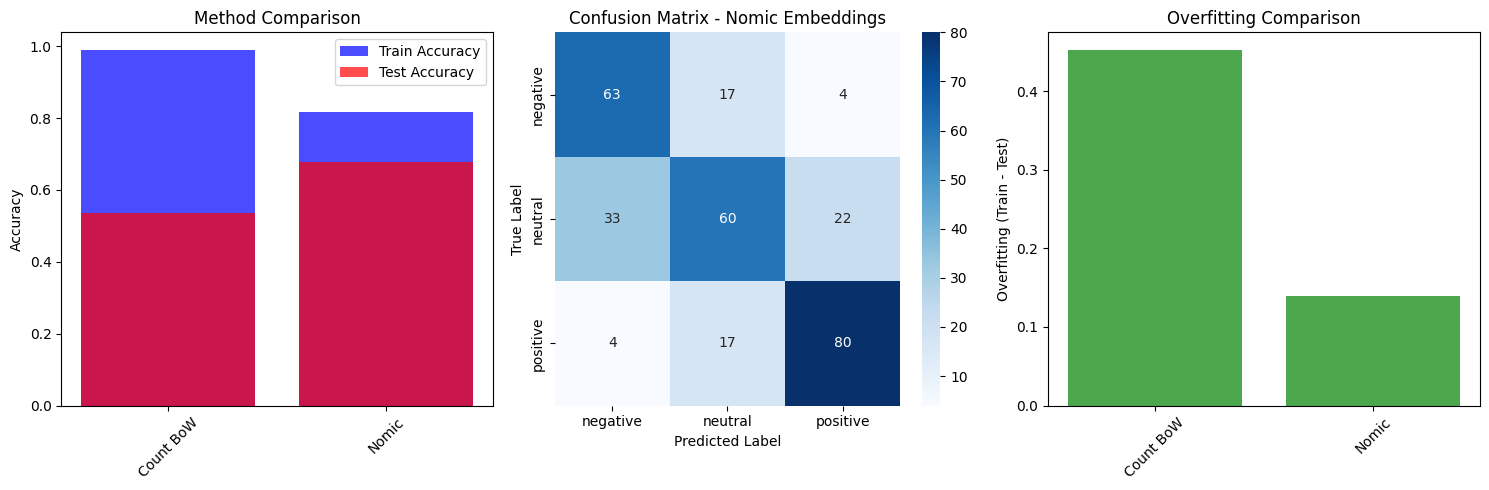

In [21]:
# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy comparison
methods = ['Count BoW', 'Nomic']
train_accs = [bow_results['count']['train_acc'], nomic_results['train_acc']]
test_accs = [bow_results['count']['test_acc'], nomic_results['test_acc']]

axes[0].bar(methods, train_accs, alpha=0.7, label='Train Accuracy', color='blue')
axes[0].bar(methods, test_accs, alpha=0.7, label='Test Accuracy', color='red')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Method Comparison')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Confusion matrix for best method
best_method = max(approaches, key=lambda x: x[1]['test_acc'])
best_predictions = best_method[1]['predictions']

cm = confusion_matrix(test_labels, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=sentiment_names, yticklabels=sentiment_names, ax=axes[1])
axes[1].set_title(f'Confusion Matrix - {best_method[0]}')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

# Overfitting analysis
overfitting_scores = [results['train_acc'] - results['test_acc'] for _, results in approaches]
axes[2].bar(methods, overfitting_scores, color='green', alpha=0.7)
axes[2].set_ylabel('Overfitting (Train - Test)')
axes[2].set_title('Overfitting Comparison')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Error Analysis

In [22]:
# Find examples where methods disagree
bow_pred = bow_results['count']['predictions']
nomic_pred = nomic_results['predictions']

# Find disagreements
disagreements = np.where(bow_pred != nomic_pred)[0]

print(f"\n=== ERROR ANALYSIS ===")
print(f"Methods disagree on {len(disagreements)}/{len(test_labels)} samples ({len(disagreements)/len(test_labels)*100:.1f}%)")

if len(disagreements) > 0:
    print(f"\nSample disagreements:")
    for i in disagreements[:5]:  # Show first 5 disagreements
        true_label = sentiment_names[test_labels[i]]
        bow_label = sentiment_names[bow_pred[i]]
        nomic_label = sentiment_names[nomic_pred[i]]
        text = test_texts[i][:100] + "..." if len(test_texts[i]) > 100 else test_texts[i]
        
        print(f"\nText: {text}")
        print(f"True: {true_label}, BoW: {bow_label}, Nomic: {nomic_label}")


=== ERROR ANALYSIS ===
Methods disagree on 145/300 samples (48.3%)

Sample disagreements:

Text: I hear tonight is the last jleno show
True: neutral, BoW: neutral, Nomic: negative

Text:  Looks like they dialed it in a LOT...payed attention to all the small but important details in game...
True: neutral, BoW: positive, Nomic: neutral

Text: 8/4/18 ☆☆☆☆: I'd give five stars if the weather showes in Celsius. Other than that, the app is absol...
True: neutral, BoW: positive, Nomic: neutral

Text:  yeahh! Ryland was amazing xD BUT I DIDN`T GET A HUG OFF HIM booo  Suarez seemed a bit off tbh..but ...
True: positive, BoW: neutral, Nomic: negative

Text: AH! so nice to be back on bike commute although three days off and my (what google sez are called) m...
True: neutral, BoW: neutral, Nomic: negative
